# VGGNet을 이용한 Fashion MNIST 데이터 분류 모델 
* __VGG__ 는 단순한 구조이면서도 성능이 좋기 때문에 미지의 특징 추출을 위한 네트워크에 많이 사용됨

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### 데이터셋 불러오기와 정규화

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

#### 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
* Conv2D 레이어에서는 채널을 가진 형태가 필요하기 때문에 reshape 로 마지막에 흑백 이미지를 의미하는 1채널을 추가한다.

In [3]:
# 형태 확인하기 
print(train_X.shape, test_X.shape)  # 2차원 데이터 

# 3차원으로 변형 
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# 형태 확인하기 
print(train_X.shape, test_X.shape)  # 3차원 데이터

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


#### VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
* VGG-19는 특징 추출기의 초반에 컨볼루션 레이어를 2개 겹친 뒤 풀링 레이어를 1개를 사용하는 패턴을 2차례, 그 후 컨볼루션 레이어를 4개 겹친 뒤 풀링 레이어를 1개 사용하는 패턴을 3차례 반복

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

#### 모델 컴파일
* __sparse_categorical_crossentropy__ : 기존의 원-핫-인코딩으로 처리해야하는 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 변환해서 처리한다. 따라서 기존에 정답 데이터에 대해 to_categorical() 함수를 처리하지 않아도 된다.
* __Adam()__ : lr을 설정하지 않으면 기본 값인 lr=0.001로 설정된다.

__compile(self, optimizer, loss, metrics=None, sample_weight_mode=None)__
* optimizer: 문자열(최적화기의 이름) 혹은 최적화기 객체입니다
* loss: 문자열(대상 함수의 이름) 혹은 대상 함수입니다
* metrics: 훈련과 시험이 진행되는 동안 모델에 의해 평가될 metric의 리스트입니다. 보통 metrics=['accuracy']형태로 사용하게 될 것입니다
* sample_weight_mode: 시간 단계별로 샘플에 가중치를 줄 필요가 있을 때(2차원 가중치)에는 "temporal"로 설정. 기본값인 "None"은 샘플 단위로 가중치를 주도록 합니다.(1차원)

In [5]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 21s 473us/sample - loss: 0.5757 - accuracy: 0.7920 - val_loss: 0.3266 - val_accuracy: 0.8796
Epoch 2/25
45000/45000 [==============================] - 18s 409us/sample - loss: 0.3635 - accuracy: 0.8704 - val_loss: 0.2786 - val_accuracy: 0.8953
Epoch 3/25
45000/45000 [==============================] - 18s 408us/sample - loss: 0.3222 - accuracy: 0.8841 - val_loss: 0.2616 - val_accuracy: 0.9043
Epoch 4/25
45000/45000 [==============================] - 18s 407us/sample - loss: 0.2953 - accuracy: 0.8938 - val_loss: 0.2337 - val_accuracy: 0.9149
Epoch 5/25
45000/45000 [==============================] - 18s 407us/sample - loss: 0.2824 - accuracy: 0.8985 - val_loss: 0.2407 - val_accuracy: 0.9120
Epoch 6/25
45000/45000 [==============================] - 18s 407us/sample - loss: 0.2753 - accuracy: 0.9014 - val_loss: 0.2276 - val_accuracy: 0.9153
Epoch 7/25
45000/45000 [====================

#### 모델 평가 
evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)
* x: Numpy 배열 혹은 Numpy 배열의 리스트(복수의 입력을 가진 모델인 경우)이며 입력 데이터입니다.
* y: Numpy 배열이며 레이블입니다.
* batch_size: 정수이며 매 기울기 업데이트마다의 샘플의 갯수입니다.
* verbose: 세부 정보 모드, 0 혹은 1 중 택일합니다.
* sample_weight: Numpy 배열이며 샘플의 가중치입니다.

In [10]:
model.evaluate(test_X, test_Y, verbose=0)

[0.22044731467962264, 0.9244]

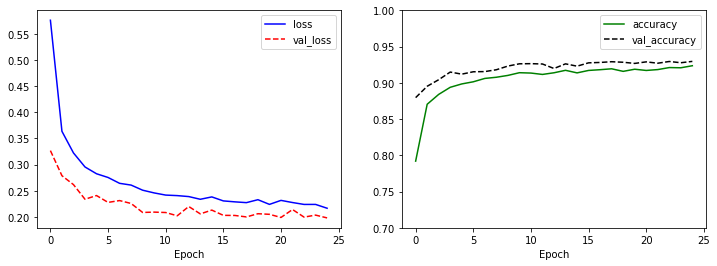

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()